
=== Testing TransformTS with method: diff ===


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Stationary, p-value: 0.0000, ADF Statistic: -4.9856

Summary Statistics:
               GDP
count   140.000000
mean    172.066757
std     261.390203
min   -1792.213000
25%      96.405500
50%     151.305500
75%     222.718000
max    1749.107000

NaN Counts:
GDP    1
dtype: int64


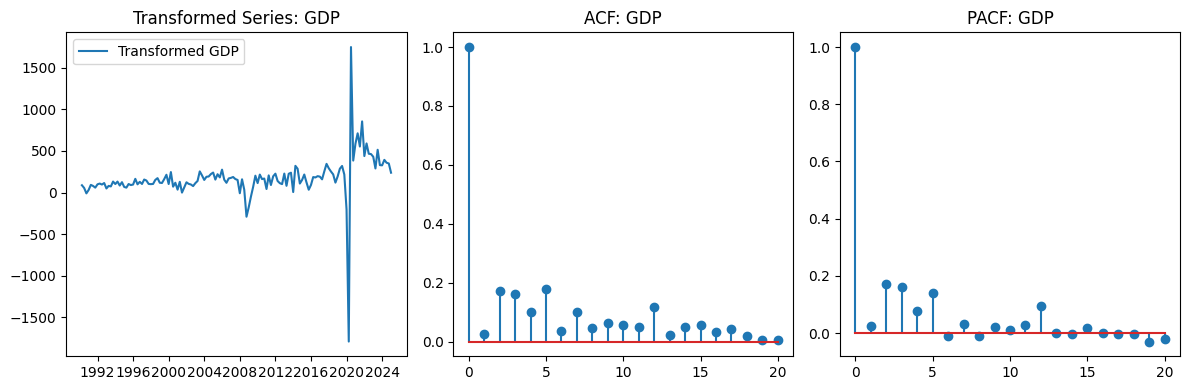


Transformed Data (first 5 rows):
                     GDP
observation_date        
1990-04-01        87.327
1990-07-01        55.088
1990-10-01       -10.383
1991-01-01        30.445
1991-04-01        91.684

Transformation Info for diff:
Column: GDP
  transformation_method: diff
  differencing_order: 1
  is_stationary: True
  p_value: 2.369131117511409e-05
  adf_statistic: -4.985648421451818
  is_log_transformed: False
  boxcox_lambda: None
  original_stationarity: True
  demeaned: True
  original_mean: 14681.494574468086
  details: Applied differencing 1 time(s) to achieve stationarity.

=== Testing TransformTS with method: boxcox ===

Error initializing with method boxcox: Column GDP contains non-positive values, cannot apply Box-Cox.

=== Testing TransformTS with method: log ===


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Non-stationary, p-value: 1.0000, ADF Statistic: 3.9976

Summary Statistics:
              GDP
count  141.000000
mean     8.459126


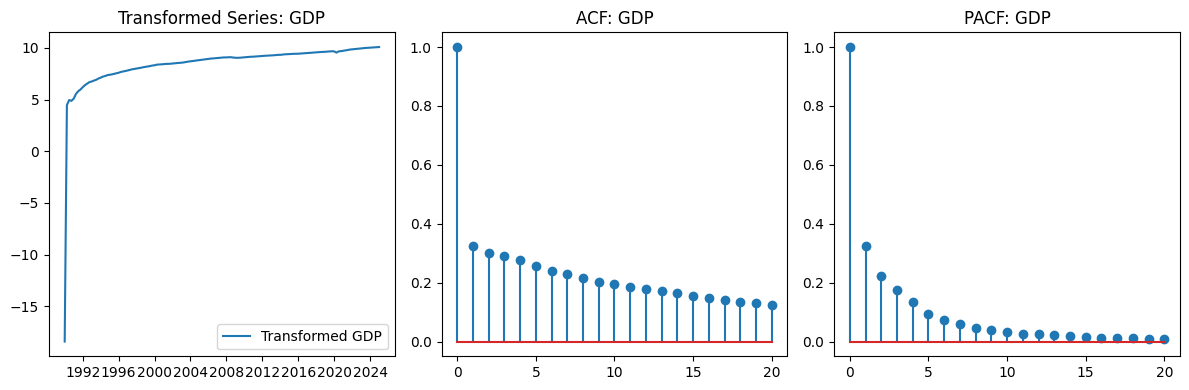


Transformed Data (first 5 rows):
                        GDP
observation_date           
1990-01-01       -18.420681
1990-04-01         4.469660
1990-07-01         4.958745
1990-10-01         4.883044
1991-01-01         5.090536

Transformation Info for log:
Column: GDP
  transformation_method: log
  differencing_order: 0
  is_stationary: False
  p_value: 1.0
  adf_statistic: 3.9976023375805374
  is_log_transformed: True
  boxcox_lambda: None
  original_stationarity: False
  demeaned: True
  original_mean: 14681.494574468086
  details: Applied log transformation (skipped as data was in log form).

=== Testing TransformTS with method: log-diff ===


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Non-stationary, p-value: 1.0000, ADF Statistic: 3.9976

Summary Statistics:
              GDP
count  140.000000
mean     0.203644
std      1.932431
min     -0.119953
25%      0.014669
50%      0.022439
75%      0.041712
max     22.890340

NaN Counts:
GDP    1
dtype: in

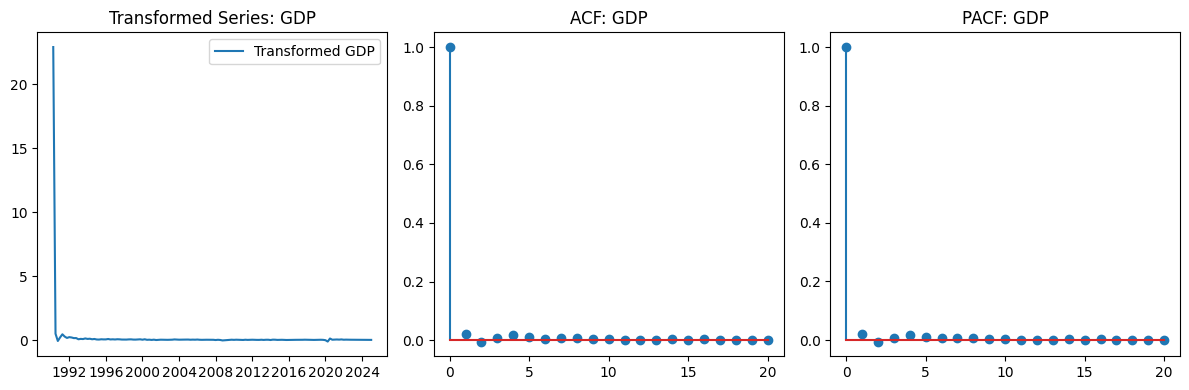


Transformed Data (first 5 rows):
                        GDP
observation_date           
1990-04-01        22.890340
1990-07-01         0.489086
1990-10-01        -0.075701
1991-01-01         0.207492
1991-04-01         0.447431

Transformation Info for log-diff:
Column: GDP
  transformation_method: log-diff
  differencing_order: 1
  is_stationary: False
  p_value: 1.0
  adf_statistic: 3.9976023375805374
  is_log_transformed: True
  boxcox_lambda: None
  original_stationarity: False
  demeaned: True
  original_mean: 14681.494574468086
  details: Applied differencing (order 1).

=== Testing TransformTS with method: hp ===


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Non-stationary, p-value: 1.0000, ADF Statistic: 3.9976

Summary Statistics:
                GDP
count  1.410000e+02
mean   1.386415e-10
std    3.134460e+02
min   -2.433828e+03
25%   -5.150037e+01
50%    3.556149e+00
75%    1.665179e+02
max    4.786346e+02

NaN Counts:
GDP    0
dtype: int64


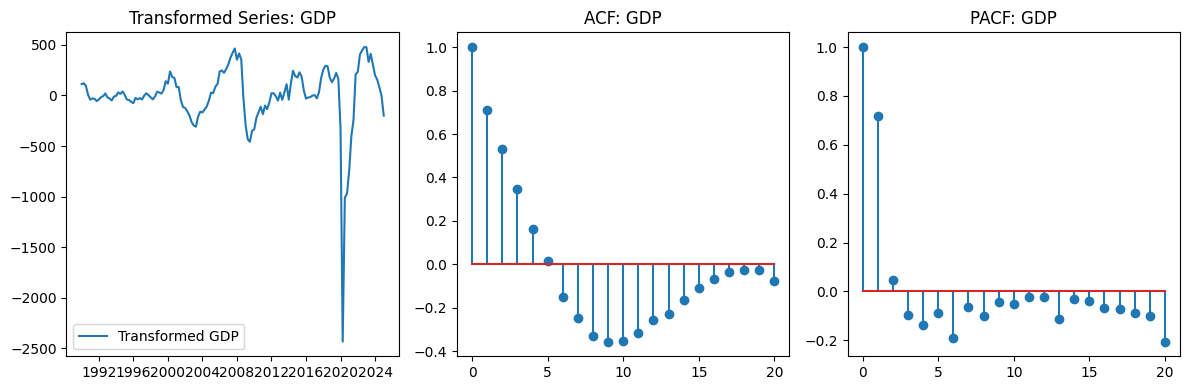


Transformed Data (first 5 rows):
                         GDP
observation_date            
1990-01-01        112.299167
1990-04-01        120.732818
1990-07-01         96.857281
1990-10-01          7.294913
1991-01-01        -41.861468

Transformation Info for hp:
Column: GDP
  transformation_method: hp
  differencing_order: 0
  is_stationary: False
  p_value: 1.0
  adf_statistic: 3.9976023375805374
  is_log_transformed: False
  boxcox_lambda: None
  original_stationarity: False
  demeaned: True
  original_mean: 14681.494574468086
  details: Applied Hodrick-Prescott filter with lambda = 1600.

=== Testing TransformTS with method: inverse ===

Error initializing with method inverse: Inverse transformation requires knowing the original transformation method and parameters.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from econometron.utils.data_preparation import TransformTS

gdp_data=pd.read_csv("../Data_Fred/gdp.csv", index_col=0, parse_dates=True)
# Test all transformation methods
methods = ['diff', 'boxcox', 'log', 'log-diff', 'hp', 'inverse']

for method in methods:
    print(f"\n=== Testing TransformTS with method: {method} ===\n")
    
    # Initialize TransformTS
    try:
        ts_transformer = TransformTS(
            data=gdp_data,
            method=method,
            demean=True,
            analysis=True,
            plot=True,  # Generate diagnostic plots
            lamb=1600,  # Default for quarterly data
            log_data=True,
            max_diff=2
        )
    except Exception as e:
        print(f"Error initializing with method {method}: {str(e)}")
        continue
    
    # Get transformed data
    try:
        transformed_data = ts_transformer.get_transformed_data()
        print(f"\nTransformed Data (first 5 rows):\n{transformed_data.head()}")
    except Exception as e:
        print(f"Error getting transformed data for method {method}: {str(e)}")
    
    # Get transformation info
    try:
        info = ts_transformer.trns_info()
        print(f"\nTransformation Info for {method}:")
        for col, details in info.items():
            print(f"Column: {col}")
            for key, value in details.items():
                print(f"  {key}: {value}")
    except Exception as e:
        print(f"Error retrieving transformation info for method {method}: {str(e)}")

    # For inverse transform, re-run with original transformed data
    if method == 'inverse':
        print("\n=== Testing inverse transform with previous log-diff data ===")
        try:
            # Use log-diff transformed data as input
            log_diff_transformer = TransformTS(
                data=gdp_data,
                method='log-diff',
                demean=True,
                analysis=False,
                plot=False
            )
            inverse_transformer = TransformTS(
                data=log_diff_transformer.get_transformed_data(),
                method='inverse',
                demean=False,
                analysis=True,
                plot=True
            )
            print(f"\nInverse Transformed Data (first 5 rows):\n{inverse_transformer.get_transformed_data().head()}")
            print(f"\nInverse Transformation Info:")
            for col, details in inverse_transformer.trns_info().items():
                print(f"Column: {col}")
                for key, value in details.items():
                    print(f"  {key}: {value}")
        except Exception as e:
            print(f"Error testing inverse transform: {str(e)}")

# Close any remaining plots
plt.close('all')